In [1]:
import os
import random
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt

from test import test
from src.modules.postprocess.renderer import render_vd


In [2]:
imgfile = 'example/sample.jpg'
save_dir = 'res'
saveprefix = 'sample'

In [3]:
test(
    imgfile = imgfile,
    savepath = save_dir,
    saveprefix = saveprefix,
    gpuid = 0, 
    #use_cpu = True, # comment out this line for the cpu option
)

/home/jupyter/git/text_vec_repos/derendering-text/src/models/vectorization.py:43: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  nn.init.xavier_normal(m.weight)
/home/jupyter/git/text_vec_repos/derendering-text/src/models/inpaintor.py:299: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  nn.init.xavier_normal(m.weight)
/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:3829: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior

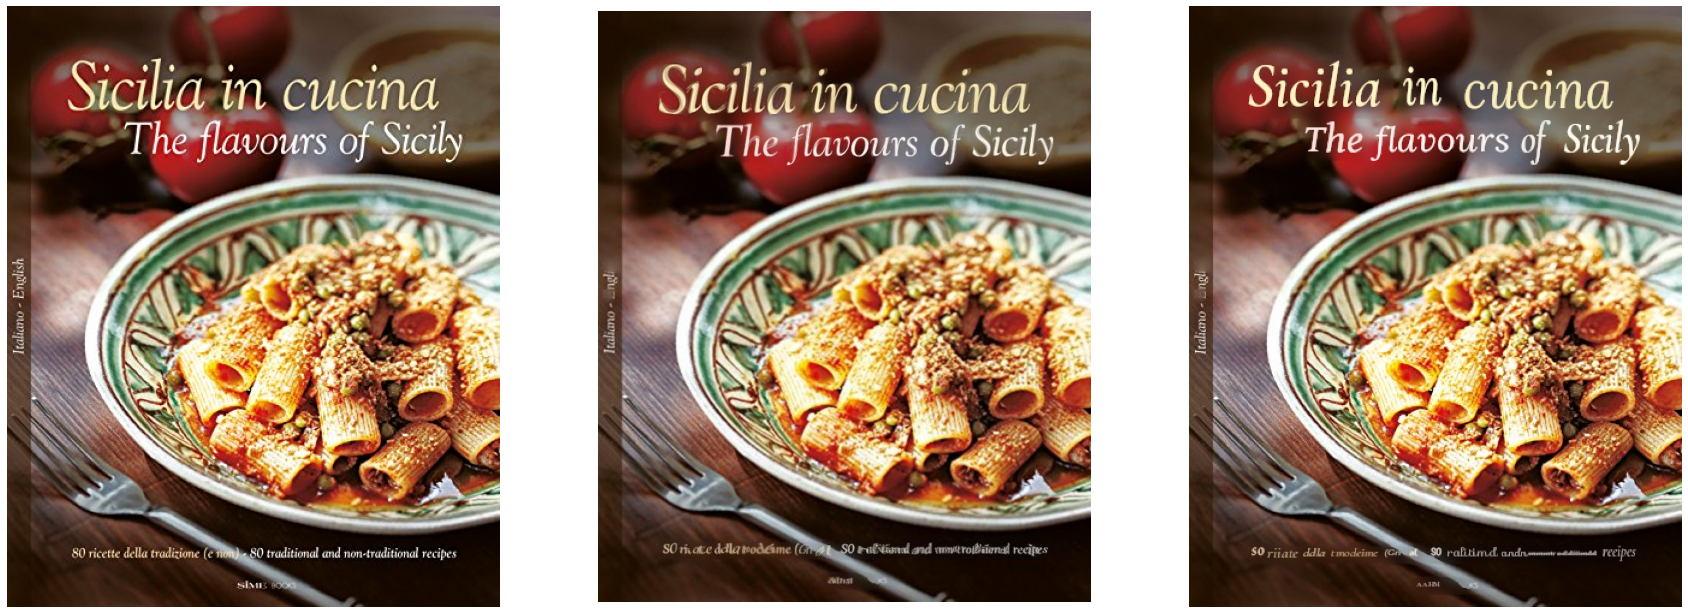

In [4]:
vd_dto = pickle.load(open(os.path.join(save_dir,f'{saveprefix}.pkl'),'rb'))
img_input = cv2.imread(imgfile)[:,:,::-1]
img_reconstructed = cv2.imread(os.path.join(save_dir,f'{saveprefix}_rec.jpg'))[:,:,::-1]
img_rendered = render_vd(vd_dto)
fig=plt.figure(figsize=(30, 30))
plt.subplot(1, 3, 1)
plt.imshow(img_input)
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(img_reconstructed)
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(img_rendered)
plt.axis("off")
plt.show()

# Introduction of the data class for vector data  
The format of the vector data is defined in `src/dto/dto_postprocess.py` and the vector data has below attributes
- bg: color pixels for background
- tb_param: text blob parameters
- effect_param: effect parameters
- effect_visibility: effect visibility parameters


# Demonstraition of text editing 

### Edit background

Background image and background replaced text images


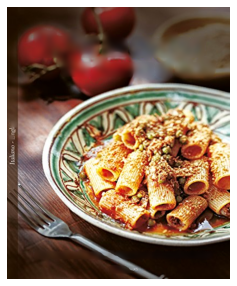

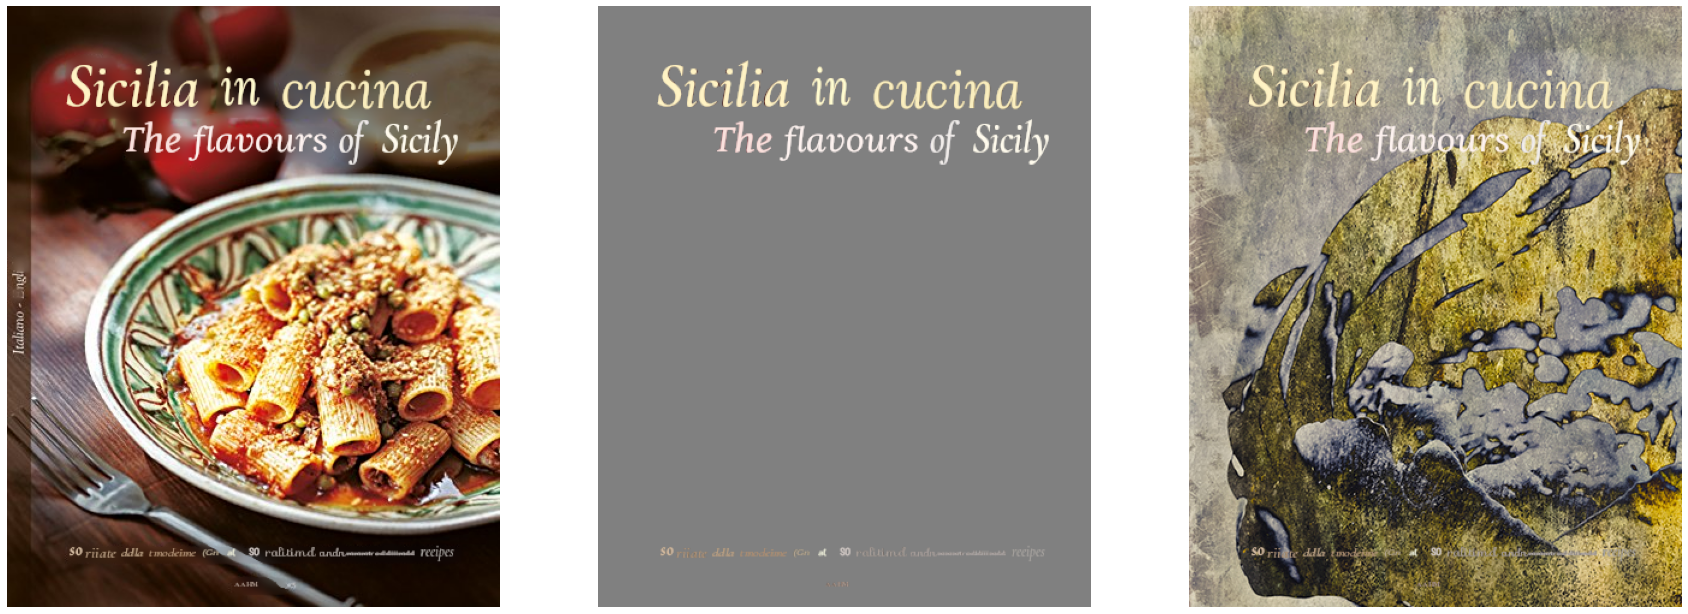

In [5]:
# load vector data
vd_dto = pickle.load(open(os.path.join(save_dir,f'{saveprefix}.pkl'),'rb'))
print("Background image and background replaced text images")
fig=plt.figure(figsize=(5, 5))
plt.imshow(vd_dto.bg.astype(np.uint8))
plt.axis("off")

h,w,_ = vd_dto.bg.shape
fig=plt.figure(figsize=(30, 30))
plt.subplot(1, 3, 1)
# render vector data
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")

plt.subplot(1, 3, 2)
# replace background
vd_dto.bg = np.zeros_like(vd_dto.bg)+128
# render edited vector data
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")

plt.subplot(1, 3, 3)
# replace background
bg=cv2.imread(os.path.join('src/modules/generator/example/bg','2.jpg'))[:,:,::-1]
bg = bg[0:h,0:w,:]
vd_dto.bg = bg
# render edited vector data
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")

plt.show()

### Edit text

OCR results
{0: 'flavours', 1: 'Sicilia', 2: 'Sicily', 3: 'cucina', 4: 'of', 5: 'andn', 6: 'ralitimd', 7: 'reeipes', 8: 'mmmtroddiiimdd', 9: 'The', 10: 'in', 11: 'SO', 12: 'ddla', 13: 'tmodeime', 14: 'SO', 15: '(Gn', 16: 'riiate', 17: 'al', 18: 'aahm'}
Edited results
{0: 'flavours', 1: 'Italia', 2: 'Sicily', 3: 'cucina', 4: 'of', 5: 'andn', 6: 'ralitimd', 7: 'reeipes', 8: 'mmmtroddiiimdd', 9: 'The', 10: 'in', 11: 'SO', 12: 'ddla', 13: 'tmodeime', 14: 'SO', 15: '(Gn', 16: 'riiate', 17: 'al', 18: 'aahm'}


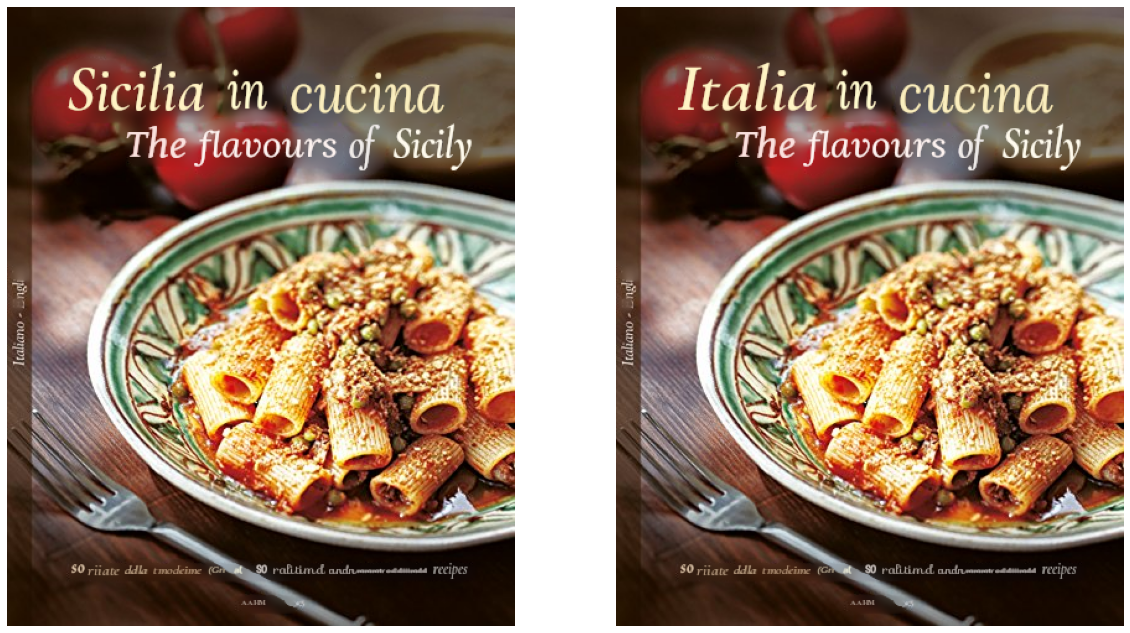

In [6]:
# load vector data
vd_dto = pickle.load(open(os.path.join(save_dir,f'{saveprefix}.pkl'),'rb'))
fig=plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")

# show OCR results
texts = vd_dto.get_texts()
print("OCR results")
print(texts)

# edit text of index:1
vd_dto.set_text(index=1, text='Italia')
texts = vd_dto.get_texts()
print("Edited results")
print(texts)

plt.subplot(1, 2, 2)
# render edited vector data
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")
plt.show()

### Edit Fill effect

{0: 'flavours', 1: 'Sicilia', 2: 'Sicily', 3: 'cucina', 4: 'of', 5: 'andn', 6: 'ralitimd', 7: 'reeipes', 8: 'mmmtroddiiimdd', 9: 'The', 10: 'in', 11: 'SO', 12: 'ddla', 13: 'tmodeime', 14: 'SO', 15: '(Gn', 16: 'riiate', 17: 'al', 18: 'aahm'}


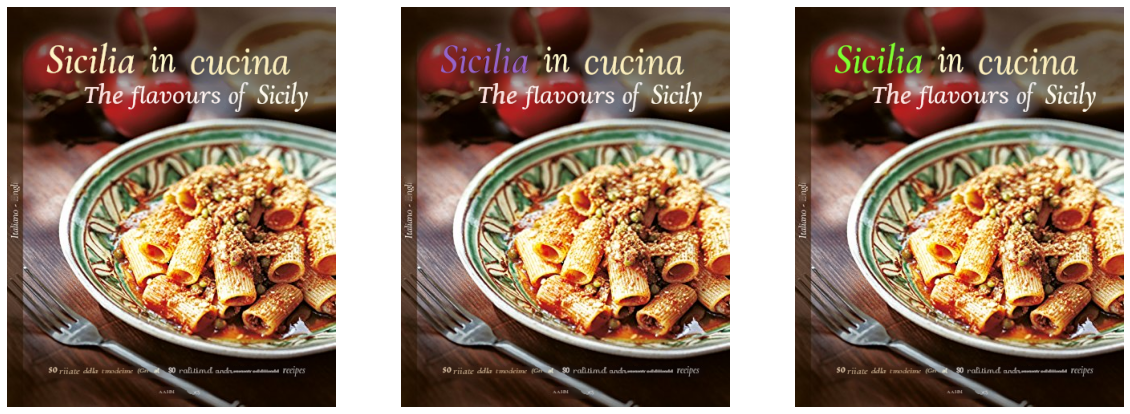

In [7]:
from src.dto.dto_skia import FillParam
# load vector data
vd_dto = pickle.load(open(os.path.join(save_dir,f'{saveprefix}.pkl'),'rb'))
fig=plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")

texts = vd_dto.get_texts()
print(texts)

# define the color of the fill effect
param = FillParam(
    color = (150,100,200)
)
# set the parameter to index:1
vd_dto.set_fill_visibility(index=1,flag=True)
vd_dto.set_fill_param(index=1,param=param)

plt.subplot(1, 3, 2)
# render edited vector data
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")

# define the color of the fill effect
param = FillParam(
    color = (128,255,50)
)
# set the parameter to index:1
vd_dto.set_fill_visibility(index=1,flag=True)
vd_dto.set_fill_param(index=1,param=param)

plt.subplot(1, 3, 3)
# render vector data
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")
plt.show()


### Edit border effect 

{0: 'flavours', 1: 'Sicilia', 2: 'Sicily', 3: 'cucina', 4: 'of', 5: 'andn', 6: 'ralitimd', 7: 'reeipes', 8: 'mmmtroddiiimdd', 9: 'The', 10: 'in', 11: 'SO', 12: 'ddla', 13: 'tmodeime', 14: 'SO', 15: '(Gn', 16: 'riiate', 17: 'al', 18: 'aahm'}


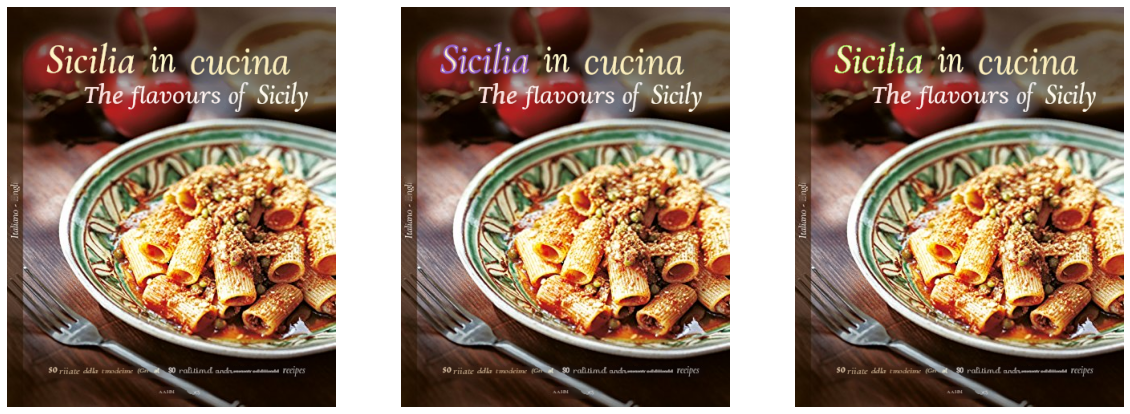

In [8]:
from src.dto.dto_skia import StrokeParam
# load vector data
vd_dto = pickle.load(open(os.path.join(save_dir,f'{saveprefix}.pkl'),'rb'))
fig=plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
# render vector data
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")

texts = vd_dto.get_texts()
print(texts)

#define the color and the parameter of the border effect
param = StrokeParam(
    border_weight = 2.,
    color = (150,100,200)
)
# set the parameter to index:1
vd_dto.set_stroke_visibility(index=1,flag=True)
vd_dto.set_stroke_param(index=1,param=param)

plt.subplot(1, 3, 2)
# render vector data
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")

# define the color and the parameter of the border effect
param = StrokeParam(
    border_weight = 0.3,
    color = (128,255,50)
)
# set the parameter to index:1
vd_dto.set_stroke_visibility(index=1,flag=True)
vd_dto.set_stroke_param(index=1,param=param)

plt.subplot(1, 3, 3)
# render vector data
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")

plt.show()


### Edit shadow effect

{0: 'flavours', 1: 'Sicilia', 2: 'Sicily', 3: 'cucina', 4: 'of', 5: 'andn', 6: 'ralitimd', 7: 'reeipes', 8: 'mmmtroddiiimdd', 9: 'The', 10: 'in', 11: 'SO', 12: 'ddla', 13: 'tmodeime', 14: 'SO', 15: '(Gn', 16: 'riiate', 17: 'al', 18: 'aahm'}


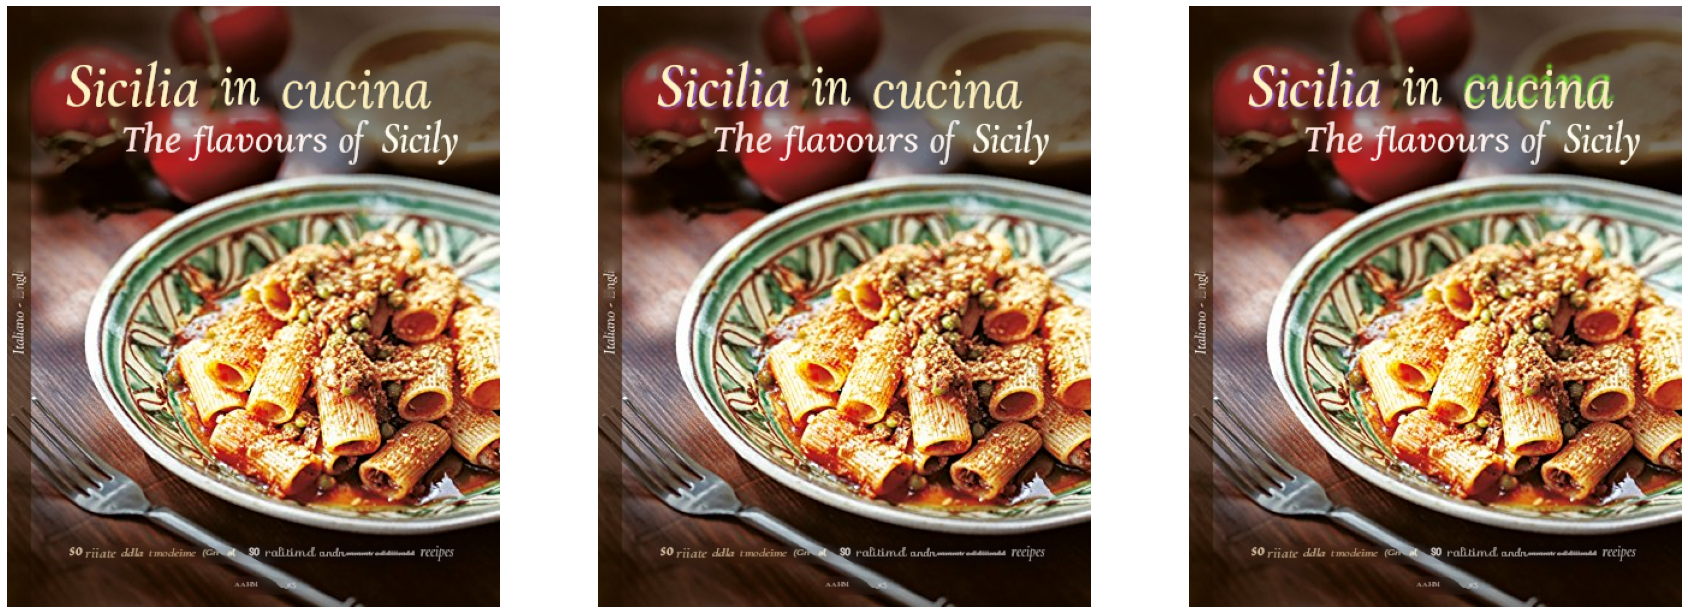

In [9]:
from src.dto.dto_skia import ShadowParam

# load vector data
vd_dto = pickle.load(open(os.path.join(save_dir,f'{saveprefix}.pkl'),'rb'))
fig=plt.figure(figsize=(30, 30))
plt.subplot(1, 3, 1)
# render vector data
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")

texts = vd_dto.get_texts()
print(texts)

# define the color and the parameter of the shadow effect
param = ShadowParam(
    opacity = 1.0,
    blur = 2,
    dilation = 0, # not used for rendering in current version
    angle = 0, # not used for rendering in current version
    shift = 0, # not used for rendering in current version
    offset_y = 2, #px
    offset_x= 2, #px
    color = (150,100,200)
)
# set the parameter to index:1
vd_dto.set_shadow_visibility(index=1,flag=True)
vd_dto.set_shadow_param(index=1,param=param)
plt.subplot(1, 3, 2)
# rendering vector data
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")

# define the color and the parameter of the shadow effect
param = ShadowParam(
    opacity = 1.0,
    blur = 2,
    dilation = 0, # not used for rendering in current version
    angle = 0, # not used for rendering in current version
    shift = 0, # not used for rendering in current version
    offset_y = -5, #px
    offset_x= 0, #px
    color = (128,255,50)
)
# set the parameter to index:3
vd_dto.set_shadow_visibility(index=3,flag=True)
vd_dto.set_shadow_param(index=3,param=param)
plt.subplot(1, 3, 3)
# render vector data
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")

plt.show()



### Edit offset information

{0: 'flavours', 1: 'Sicilia', 2: 'Sicily', 3: 'cucina', 4: 'of', 5: 'andn', 6: 'ralitimd', 7: 'reeipes', 8: 'mmmtroddiiimdd', 9: 'The', 10: 'in', 11: 'SO', 12: 'ddla', 13: 'tmodeime', 14: 'SO', 15: '(Gn', 16: 'riiate', 17: 'al', 18: 'aahm'}
index:1, y:83,x:51
index:10, y:82,x:223


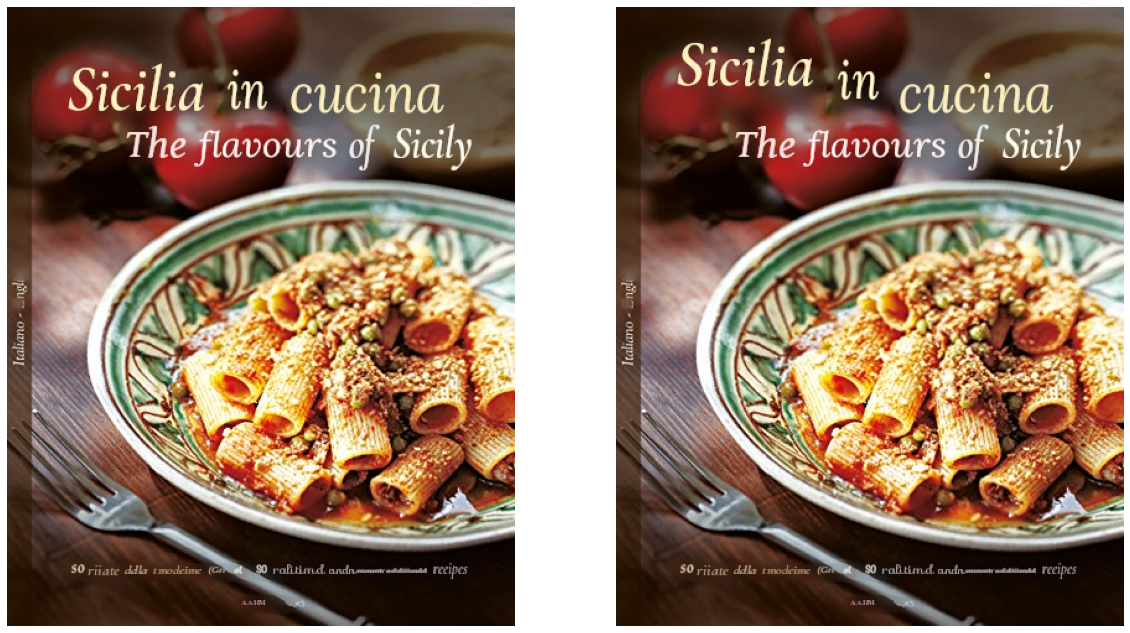

In [10]:
# load vector data
vd_dto = pickle.load(open(os.path.join(save_dir,f'{saveprefix}.pkl'),'rb'))
fig=plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")

texts = vd_dto.get_texts()
print(texts)
y,x = vd_dto.get_offset(index=1)
print(f'index:1, y:{y},x:{x}')
# set the offsets to index:1
vd_dto.set_offset(index=1,offset_y=y-20,offset_x=x)

y,x = vd_dto.get_offset(index=10)
print(f'index:10, y:{y},x:{x}')
# set the offsets to index:10
vd_dto.set_offset(index=10,offset_y=y-8,offset_x=x+2)

plt.subplot(1, 2, 2)
# render vector data
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")

plt.show()

### Edit font 

{0: 'flavours', 1: 'Sicilia', 2: 'Sicily', 3: 'cucina', 4: 'of', 5: 'andn', 6: 'ralitimd', 7: 'reeipes', 8: 'mmmtroddiiimdd', 9: 'The', 10: 'in', 11: 'SO', 12: 'ddla', 13: 'tmodeime', 14: 'SO', 15: '(Gn', 16: 'riiate', 17: 'al', 18: 'aahm'}
font_path data/fonts/gfonts/ofl/aubrey/Aubrey-Regular.ttf


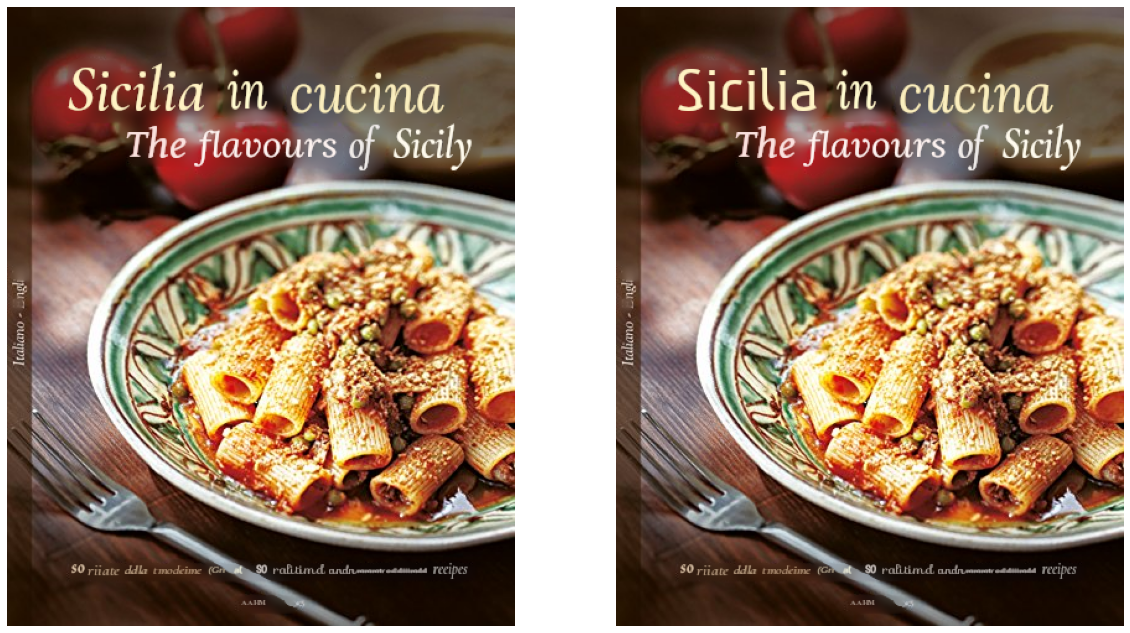

In [11]:
# load vector data
vd_dto = pickle.load(open(os.path.join(save_dir,f'{saveprefix}.pkl'),'rb'))
fig=plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")

texts = vd_dto.get_texts()
print(texts)

# pick font
font_id = random.randint(0,99)

# set font
vd_dto.set_font(index=1, font_id=font_id)
# show font
vd_dto.show_font(index=1)

plt.subplot(1, 2, 2)
# render vector data
img_rendered = render_vd(vd_dto)
plt.imshow(img_rendered)
plt.axis("off")
plt.show()